In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
!pip install pandas matplotlib seaborn scikit-learn


/kaggle/input/diabetics-data/Diabetics_dataset.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
data = pd.read_csv("/kaggle/input/diabetics-data/Diabetics_dataset.csv")

# data = RAW_DATA.sample(frac=1, random_state=100).reset_index(drop=True)
data.head(10)

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,2,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0
2,3,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0
3,4,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,5,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0
5,6,5.0,116.0,74.0,0.0,0.0,25.6,0.201,30.0,0.0
6,7,3.0,78.0,50.0,32.0,88.0,31.0,0.248,26.0,1.0
7,8,10.0,115.0,0.0,0.0,0.0,35.3,0.134,29.0,0.0
8,9,2.0,197.0,70.0,45.0,543.0,30.5,0.158,53.0,1.0
9,10,8.0,125.0,96.0,0.0,0.0,0.0,0.232,54.0,1.0


<Axes: >

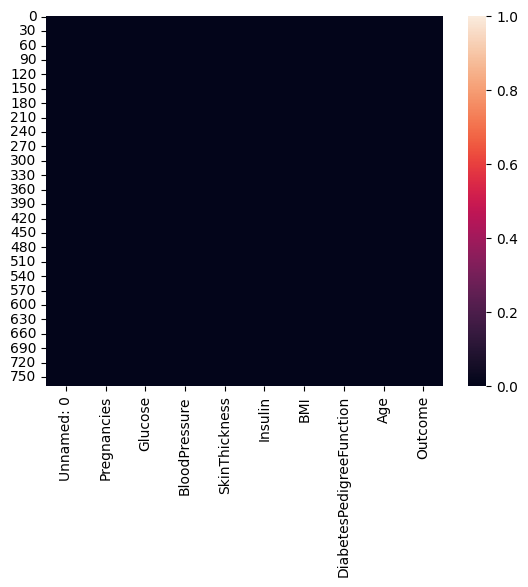

In [4]:
sns.heatmap(data.isnull())

In [5]:
data.columns

Index(['Unnamed: 0', 'Pregnancies', 'Glucose', 'BloodPressure',
       'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age',
       'Outcome'],
      dtype='object')

In [6]:
correlation = data.corr()
print(correlation)

                          Unnamed: 0  Pregnancies   Glucose  BloodPressure  \
Unnamed: 0                  1.000000    -0.037201  0.012994       0.020953   
Pregnancies                -0.037201     1.000000  0.129459       0.141282   
Glucose                     0.012994     0.129459  1.000000       0.152590   
BloodPressure               0.020953     0.141282  0.152590       1.000000   
SkinThickness               0.019006    -0.081672  0.057328       0.207371   
Insulin                     0.001998    -0.073535  0.331357       0.088933   
BMI                         0.012320     0.017683  0.221071       0.281805   
DiabetesPedigreeFunction   -0.040326    -0.033523  0.137337       0.041265   
Age                         0.007714     0.544341  0.263514       0.239528   
Outcome                    -0.045184     0.221898  0.466581       0.065068   

                          SkinThickness   Insulin       BMI  \
Unnamed: 0                     0.019006  0.001998  0.012320   
Pregnancies    

<Axes: >

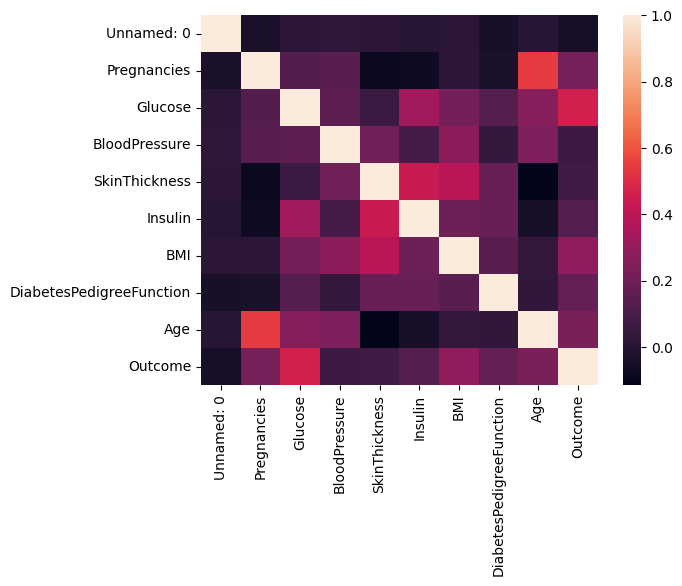

In [7]:
sns.heatmap(correlation)

In [8]:
X = data.drop("Outcome",axis=1)
Y=data["Outcome"]
Y

0      1.0
1      0.0
2      1.0
3      0.0
4      1.0
      ... 
764    0.0
765    0.0
766    1.0
767    0.0
768    NaN
Name: Outcome, Length: 769, dtype: float64

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train
# # Display the shapes of the training and testing sets
# X_train.shape, X_test.shape, Y_train.shape, Y_test.shape



,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,61,2.0,84.0,0.0,0.0,0.0,0.0,0.304,21.0
618,619,9.0,112.0,82.0,24.0,0.0,28.2,1.282,50.0
346,347,1.0,139.0,46.0,19.0,83.0,28.7,0.654,22.0
294,295,0.0,161.0,50.0,0.0,0.0,21.9,0.254,65.0
231,232,6.0,134.0,80.0,37.0,370.0,46.2,0.238,46.0
...,...,...,...,...,...,...,...,...,...
71,72,5.0,139.0,64.0,35.0,140.0,28.6,0.411,26.0
106,107,1.0,96.0,122.0,0.0,0.0,22.4,0.207,27.0
270,271,10.0,101.0,86.0,37.0,0.0,45.6,1.136,38.0
435,436,0.0,141.0,0.0,0.0,0.0,42.4,0.205,29.0


In [10]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

   Unnamed: 0  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  \
0           1          6.0    148.0           72.0           35.0      0.0   
1           2          1.0     85.0           66.0           29.0      0.0   
2           3          8.0    183.0           64.0            0.0      0.0   
3           4          1.0     89.0           66.0           23.0     94.0   
4           5          0.0    137.0           40.0           35.0    168.0   
5           6          5.0    116.0           74.0            0.0      0.0   
6           7          3.0     78.0           50.0           32.0     88.0   
7           8         10.0    115.0            0.0            0.0      0.0   
8           9          2.0    197.0           70.0           45.0    543.0   
9          10          8.0    125.0           96.0            0.0      0.0   

    BMI  DiabetesPedigreeFunction   Age  Outcome  
0  33.6                     0.627  50.0      1.0  
1  26.6                     0.351  31.0

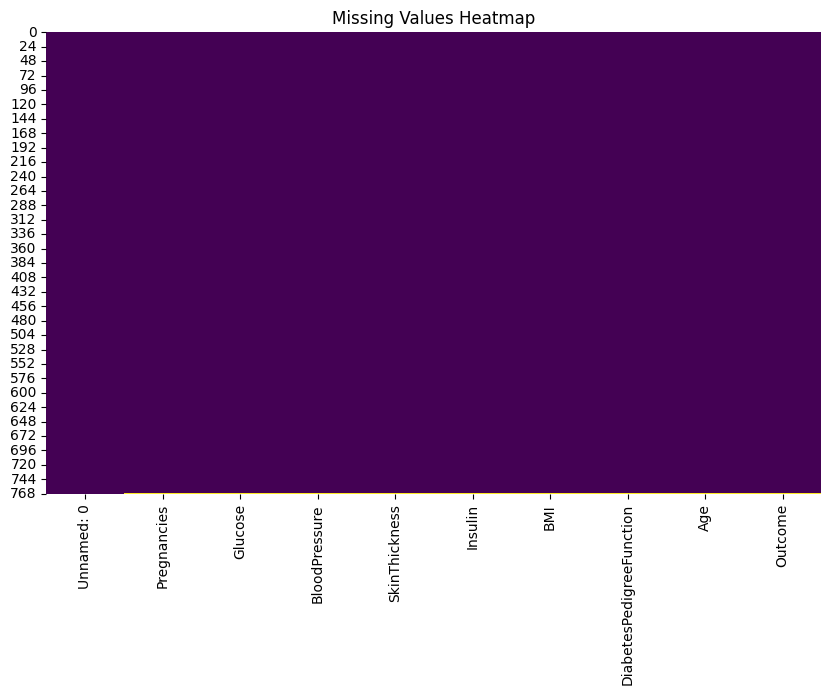

Index(['Unnamed: 0', 'Pregnancies', 'Glucose', 'BloodPressure',
       'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age',
       'Outcome'],
      dtype='object')
                          Unnamed: 0  Pregnancies   Glucose  BloodPressure  \
Unnamed: 0                  1.000000    -0.037201  0.012994       0.020953   
Pregnancies                -0.037201     1.000000  0.129459       0.141282   
Glucose                     0.012994     0.129459  1.000000       0.152590   
BloodPressure               0.020953     0.141282  0.152590       1.000000   
SkinThickness               0.019006    -0.081672  0.057328       0.207371   
Insulin                     0.001998    -0.073535  0.331357       0.088933   
BMI                         0.012320     0.017683  0.221071       0.281805   
DiabetesPedigreeFunction   -0.040326    -0.033523  0.137337       0.041265   
Age                         0.007714     0.544341  0.263514       0.239528   
Outcome                    -0.045184  

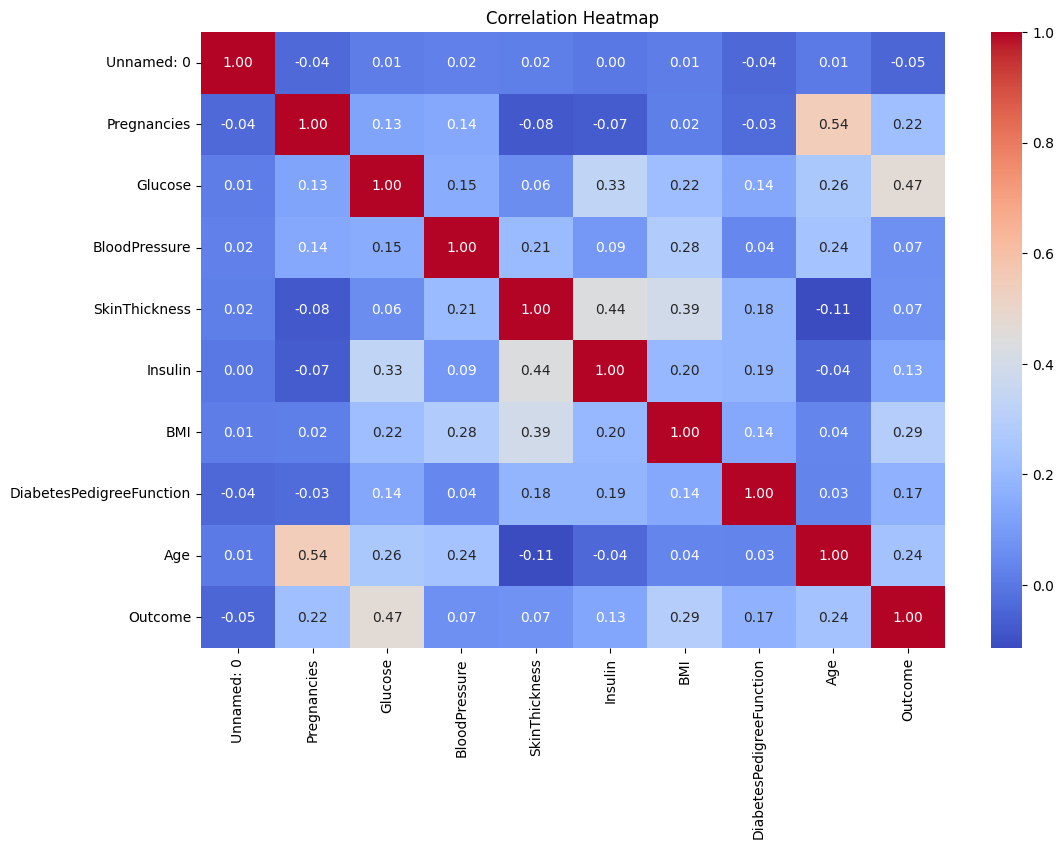

Mean Squared Error: 0.1719601902831628
R^2 Score: 0.25101783787777954
Accuracy: 0.7597402597402597


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score  # Import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer  # Importing SimpleImputer

# Load the dataset
data = pd.read_csv("/kaggle/input/diabetics-data/Diabetics_dataset.csv")

# Display the first 10 rows of the dataset
print(data.head(10))

# Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

# Show the columns of the dataset
print(data.columns)

# Display the correlation matrix
correlation = data.corr()
print(correlation)

# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Define features and target variable
# Assume 'Outcome' is the target variable indicating diabetes presence
X = data.drop('Outcome', axis=1)  # Features
Y = data['Outcome']                 # Target variable

# Handle missing values in features
imputer = SimpleImputer(strategy='mean')  # You can also use 'median' or 'most_frequent'
X = imputer.fit_transform(X)  # Impute missing values in features

# Handle missing values in target variable (if any)
if Y.isnull().any():
    # Dropping rows with NaN values in target variable
    data = data.dropna(subset=['Outcome'])
    # Re-define X and Y after dropping
    X = data.drop('Outcome', axis=1)
    Y = data['Outcome']

# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Standardize the feature variables
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train the linear regression model
lm = LinearRegression()
lm.fit(X_train, Y_train)

# Make predictions
Y_pred = lm.predict(X_test)

# Convert predictions to binary (0 or 1) based on a threshold (0.5 for binary classification)
Y_pred_binary = [1 if pred >= 0.5 else 0 for pred in Y_pred]

# Evaluate the model
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
accuracy = accuracy_score(Y_test, Y_pred_binary)  # Calculate accuracy

# Print metrics
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')
print(f'Accuracy: {accuracy}')


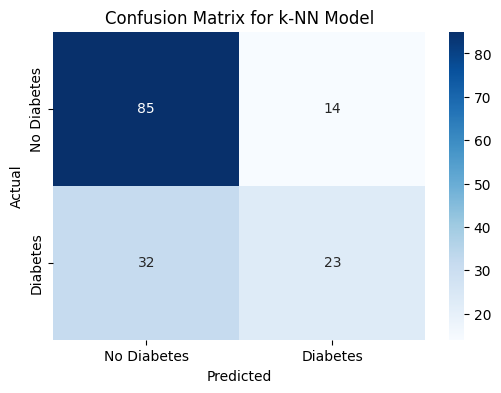

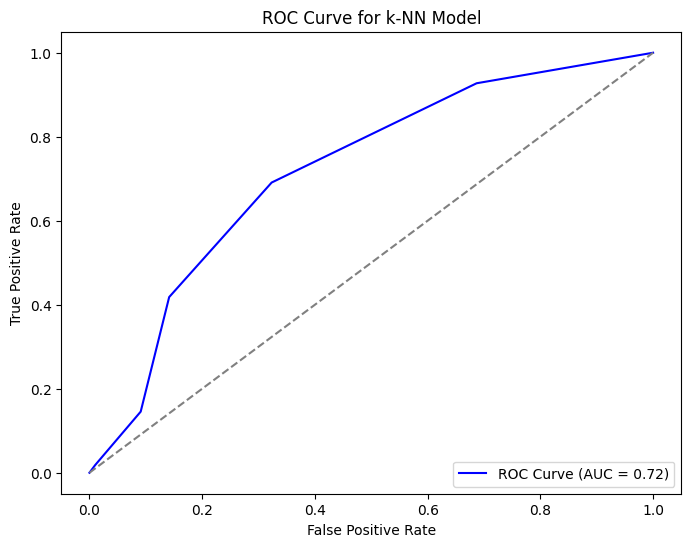

k-NN Model Accuracy: 0.7012987012987013
Classification Report:
               precision    recall  f1-score   support

         0.0       0.73      0.86      0.79        99
         1.0       0.62      0.42      0.50        55

    accuracy                           0.70       154
   macro avg       0.67      0.64      0.64       154
weighted avg       0.69      0.70      0.68       154



In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score

# Load and preprocess the dataset as done previously
# Assume data loading, missing value handling, and standardization steps are already done

# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize k-NN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Train the k-NN model
knn.fit(X_train, Y_train)

# Make predictions
Y_pred_knn = knn.predict(X_test)

# Confusion Matrix
conf_matrix = confusion_matrix(Y_test, Y_pred_knn)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for k-NN Model')
plt.show()

# ROC Curve
# For ROC, we need predicted probabilities
Y_pred_proba = knn.predict_proba(X_test)[:, 1]  # Probability for the positive class (Diabetes)

fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Dashed diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for k-NN Model')
plt.legend(loc='lower right')
plt.show()

# Print evaluation metrics
accuracy_knn = accuracy_score(Y_test, Y_pred_knn)
classification_rep = classification_report(Y_test, Y_pred_knn)
print(f'k-NN Model Accuracy: {accuracy_knn}')
print("Classification Report:\n", classification_rep)


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


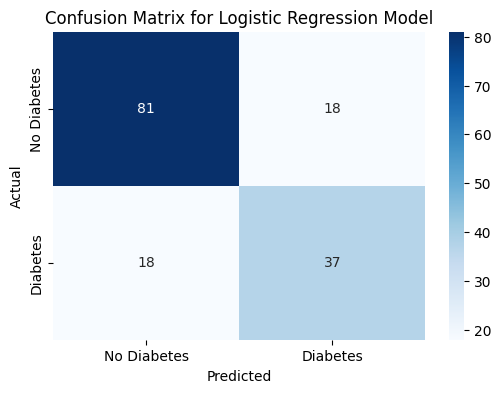

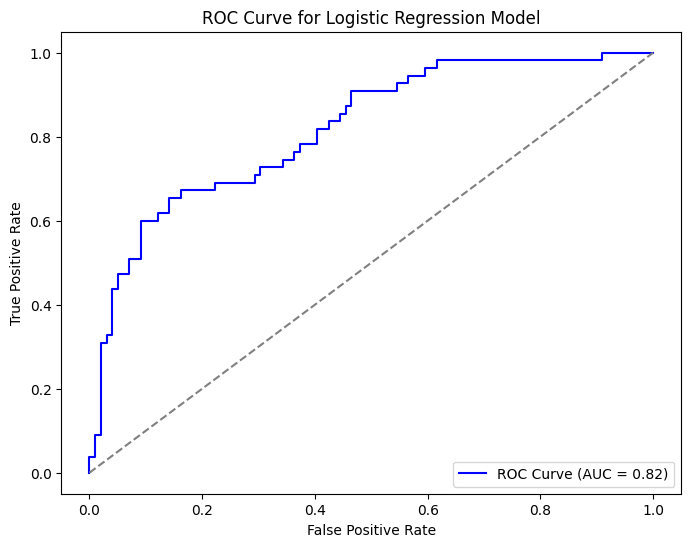

Logistic Regression Model Accuracy: 0.7662337662337663
Classification Report:
               precision    recall  f1-score   support

         0.0       0.82      0.82      0.82        99
         1.0       0.67      0.67      0.67        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming data loading, preprocessing, and splitting steps have been completed

# Initialize Logistic Regression model
log_reg = LogisticRegression()

# Train the model
log_reg.fit(X_train, Y_train)

# Make predictions
Y_pred_log_reg = log_reg.predict(X_test)

# Confusion Matrix
conf_matrix = confusion_matrix(Y_test, Y_pred_log_reg)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression Model')
plt.show()

# ROC Curve
# Obtain predicted probabilities for the positive class
Y_pred_proba_log_reg = log_reg.predict_proba(X_test)[:, 1]

# Calculate FPR, TPR and thresholds
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_proba_log_reg)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Dashed diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression Model')
plt.legend(loc='lower right')
plt.show()

# Print evaluation metrics
accuracy_log_reg = accuracy_score(Y_test, Y_pred_log_reg)
classification_rep = classification_report(Y_test, Y_pred_log_reg)
print(f'Logistic Regression Model Accuracy: {accuracy_log_reg}')
print("Classification Report:\n", classification_rep)


Estimated number of clusters: 0


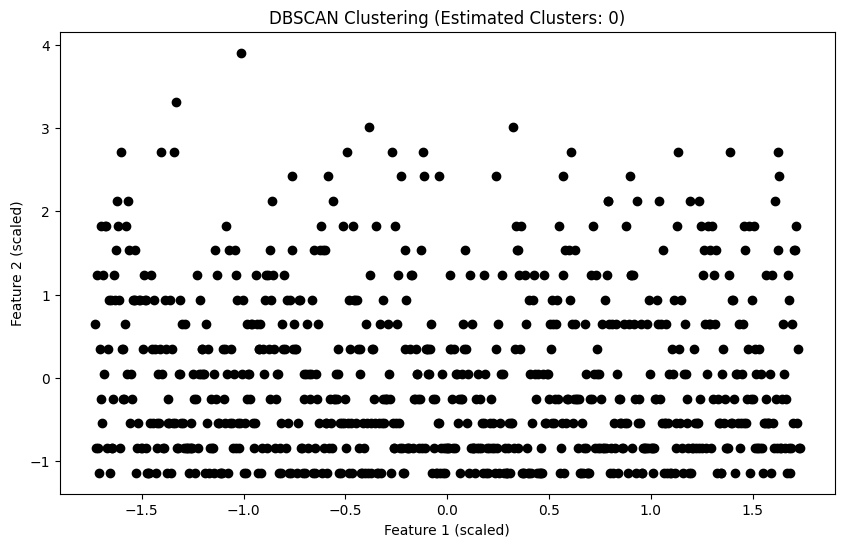

In [20]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming data is loaded and preprocessed (except for standard scaling)
# Scaling features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Scale all features in X

# Initialize DBSCAN with chosen parameters
# eps: max distance between two samples to be considered neighbors
# min_samples: min number of samples to form a dense region
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Fit DBSCAN model and get cluster labels
cluster_labels = dbscan.fit_predict(X_scaled)

# Add cluster labels to the dataset (optional for visualization)
data['Cluster'] = cluster_labels  # -1 indicates noise/outliers

# Count the number of clusters (excluding noise if -1 is used for outliers)
num_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
print(f"Estimated number of clusters: {num_clusters}")

# Optional: Calculate Silhouette Score (works if more than 1 cluster is found)
if num_clusters > 1:
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    print(f'Silhouette Score: {silhouette_avg}')

# Plot the clusters (2D Visualization if dataset has many features)
plt.figure(figsize=(10, 6))
unique_labels = set(cluster_labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black color for noise
        col = [0, 0, 0, 1]

    class_member_mask = (cluster_labels == k)
    xy = X_scaled[class_member_mask]

    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=6)

plt.title(f'DBSCAN Clustering (Estimated Clusters: {num_clusters})')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.show()


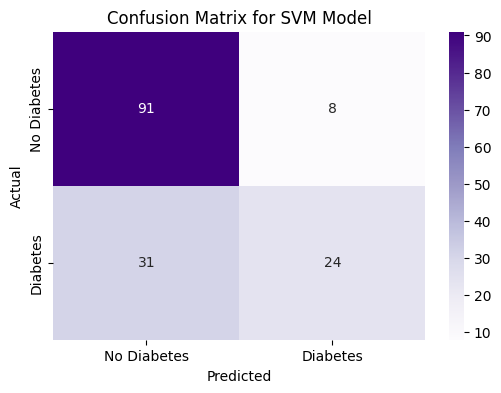

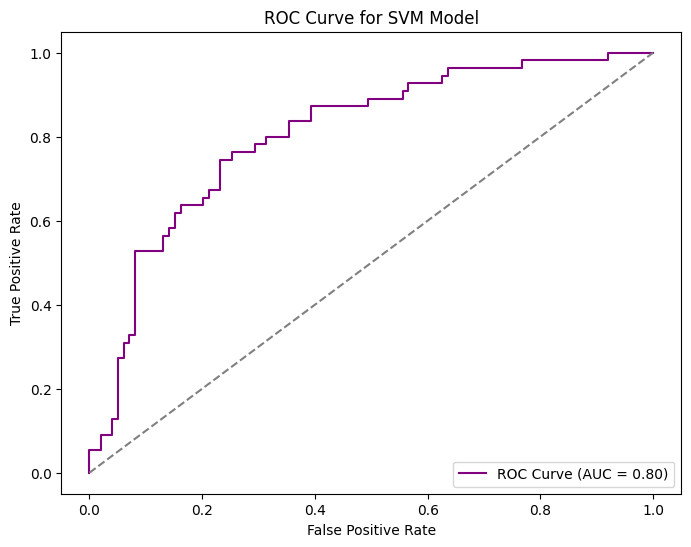

SVM Model Accuracy: 0.7467532467532467
Classification Report:
               precision    recall  f1-score   support

         0.0       0.75      0.92      0.82        99
         1.0       0.75      0.44      0.55        55

    accuracy                           0.75       154
   macro avg       0.75      0.68      0.69       154
weighted avg       0.75      0.75      0.73       154



In [23]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the SVM model with probability=True to enable probability estimates
svm_model = SVC(probability=True, random_state=42)

# Train the SVM model
svm_model.fit(X_train, Y_train)

# Make predictions
Y_pred_svm = svm_model.predict(X_test)

# Confusion Matrix
conf_matrix_svm = confusion_matrix(Y_test, Y_pred_svm)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_svm, annot=True, fmt="d", cmap="Purples", xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for SVM Model')
plt.show()

# ROC Curve
# Obtain predicted probabilities for the positive class
Y_pred_proba_svm = svm_model.predict_proba(X_test)[:, 1]

# Calculate FPR, TPR and thresholds
fpr_svm, tpr_svm, thresholds_svm = roc_curve(Y_test, Y_pred_proba_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, color='purple', label=f'ROC Curve (AUC = {roc_auc_svm:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Dashed diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM Model')
plt.legend(loc='lower right')
plt.show()

# Print evaluation metrics
accuracy_svm = accuracy_score(Y_test, Y_pred_svm)
classification_rep_svm = classification_report(Y_test, Y_pred_svm)
print(f'SVM Model Accuracy: {accuracy_svm}')
print("Classification Report:\n", classification_rep_svm)


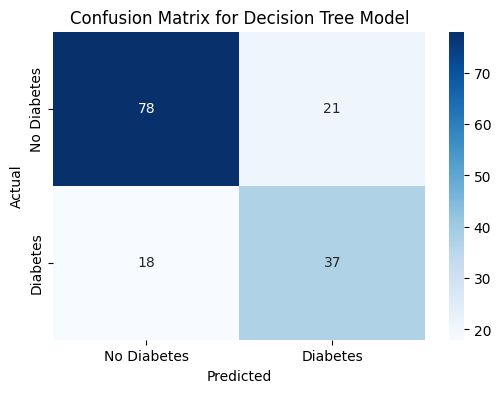

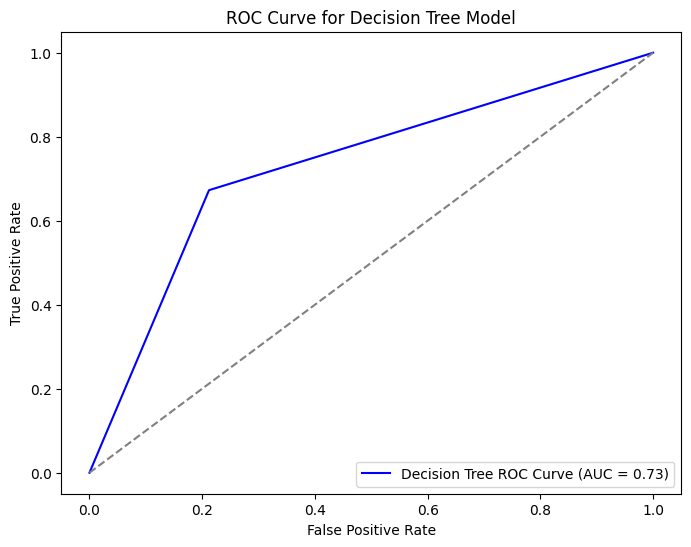

Decision Tree Model Accuracy: 0.7467532467532467
Classification Report for Decision Tree:
               precision    recall  f1-score   support

         0.0       0.81      0.79      0.80        99
         1.0       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



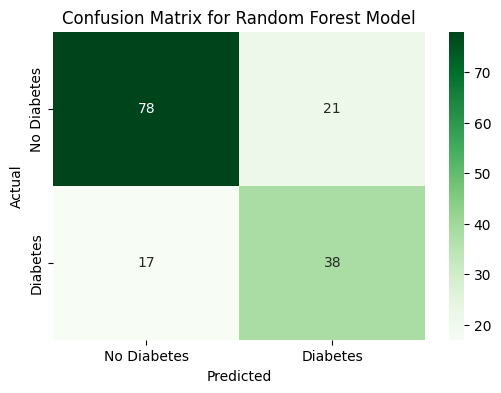

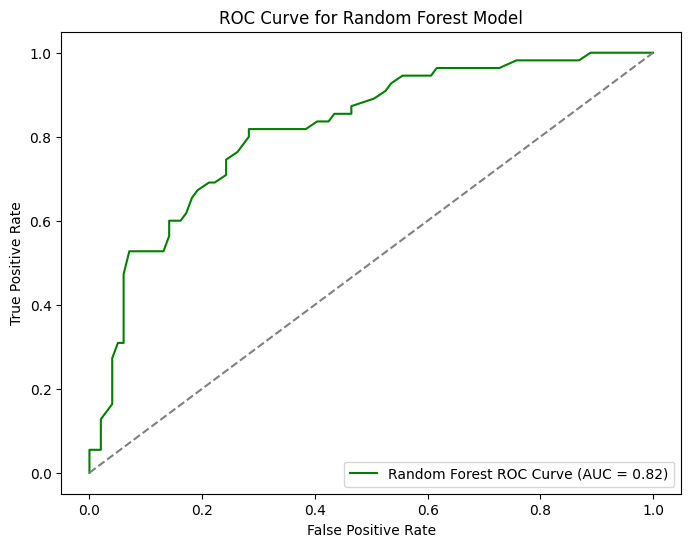

Random Forest Model Accuracy: 0.7532467532467533
Classification Report for Random Forest:
               precision    recall  f1-score   support

         0.0       0.82      0.79      0.80        99
         1.0       0.64      0.69      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.74       154
weighted avg       0.76      0.75      0.76       154



In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree model
decision_tree.fit(X_train, Y_train)

# Make predictions
Y_pred_dt = decision_tree.predict(X_test)

# Confusion Matrix for Decision Tree
conf_matrix_dt = confusion_matrix(Y_test, Y_pred_dt)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_dt, annot=True, fmt="d", cmap="Blues", xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Tree Model')
plt.show()

# ROC Curve for Decision Tree
Y_pred_proba_dt = decision_tree.predict_proba(X_test)[:, 1]
fpr_dt, tpr_dt, thresholds_dt = roc_curve(Y_test, Y_pred_proba_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Plot ROC Curve for Decision Tree
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, color='blue', label=f'Decision Tree ROC Curve (AUC = {roc_auc_dt:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Dashed diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree Model')
plt.legend(loc='lower right')
plt.show()

# Print evaluation metrics for Decision Tree
accuracy_dt = accuracy_score(Y_test, Y_pred_dt)
classification_rep_dt = classification_report(Y_test, Y_pred_dt)
print(f'Decision Tree Model Accuracy: {accuracy_dt}')
print("Classification Report for Decision Tree:\n", classification_rep_dt)

# Initialize Random Forest model
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest model
random_forest.fit(X_train, Y_train)

# Make predictions
Y_pred_rf = random_forest.predict(X_test)

# Confusion Matrix for Random Forest
conf_matrix_rf = confusion_matrix(Y_test, Y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Greens", xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

# ROC Curve for Random Forest
Y_pred_proba_rf = random_forest.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(Y_test, Y_pred_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC Curve for Random Forest
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='green', label=f'Random Forest ROC Curve (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Dashed diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest Model')
plt.legend(loc='lower right')
plt.show()

# Print evaluation metrics for Random Forest
accuracy_rf = accuracy_score(Y_test, Y_pred_rf)
classification_rep_rf = classification_report(Y_test, Y_pred_rf)
print(f'Random Forest Model Accuracy: {accuracy_rf}')
print("Classification Report for Random Forest:\n", classification_rep_rf)


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50


I0000 00:00:1730042308.175021     232 service.cc:145] XLA service 0x78d93c006020 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1730042308.175088     232 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


 1/16 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - accuracy: 0.5938 - loss: 28.5324

I0000 00:00:1730042309.174118     232 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - accuracy: 0.6073 - loss: 13.8745 - val_accuracy: 0.5691 - val_loss: 3.3329
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6514 - loss: 2.4706 - val_accuracy: 0.5772 - val_loss: 2.2188
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6539 - loss: 1.3501 - val_accuracy: 0.6585 - val_loss: 0.8417
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6718 - loss: 0.7934 - val_accuracy: 0.6179 - val_loss: 0.9270
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6928 - loss: 0.9225 - val_accuracy: 0.6585 - val_loss: 0.7282
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6772 - loss: 0.7313 - val_accuracy: 0.6504 - val_loss: 0.8693
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6810 - loss: 0.7563 - val_accuracy: 0.6423 - val_loss: 1.4440
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6504 - loss: 0.9680 - val_accuracy: 0.6667 - val_loss: 0.7129
E

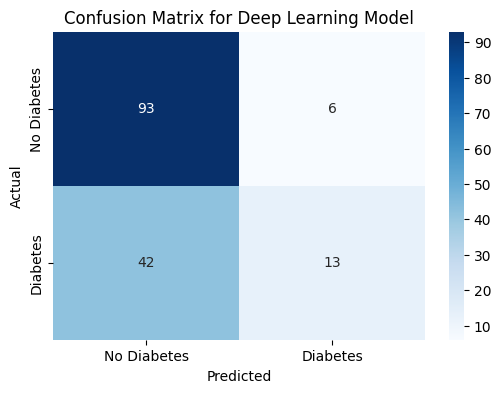

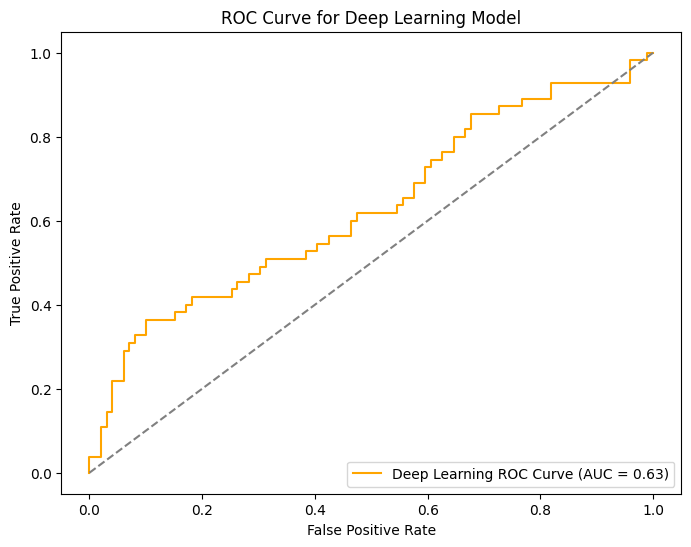

Deep Learning Model Accuracy: 0.6883116883116883
Classification Report for Deep Learning:
               precision    recall  f1-score   support

         0.0       0.69      0.94      0.79        99
         1.0       0.68      0.24      0.35        55

    accuracy                           0.69       154
   macro avg       0.69      0.59      0.57       154
weighted avg       0.69      0.69      0.64       154



In [25]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X_train, X_test, Y_train, Y_test are already defined

# Define the neural network model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer
    layers.Dense(32, activation='relu'),  # Hidden layer
    layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, Y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Make predictions
Y_pred_prob = model.predict(X_test).flatten()  # Get predicted probabilities
Y_pred = (Y_pred_prob > 0.5).astype(int)  # Convert probabilities to binary predictions

# Confusion Matrix
conf_matrix_dl = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_dl, annot=True, fmt="d", cmap="Blues", xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Deep Learning Model')
plt.show()

# ROC Curve
fpr_dl, tpr_dl, thresholds_dl = roc_curve(Y_test, Y_pred_prob)
roc_auc_dl = auc(fpr_dl, tpr_dl)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_dl, tpr_dl, color='orange', label=f'Deep Learning ROC Curve (AUC = {roc_auc_dl:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Dashed diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Deep Learning Model')
plt.legend(loc='lower right')
plt.show()

# Print evaluation metrics
accuracy_dl = accuracy_score(Y_test, Y_pred)
classification_rep_dl = classification_report(Y_test, Y_pred)
print(f'Deep Learning Model Accuracy: {accuracy_dl}')
print("Classification Report for Deep Learning:\n", classification_rep_dl)


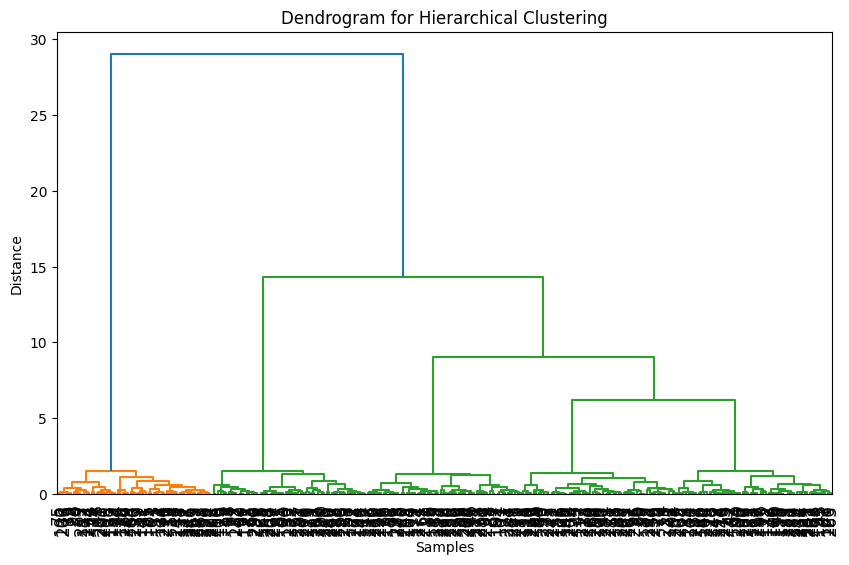

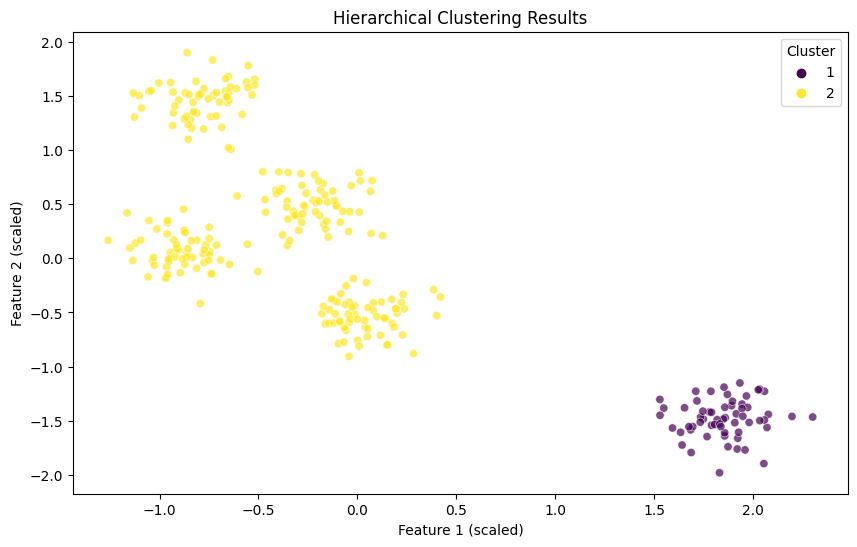

Cluster labels: [1 2 2 1 2 2 2 2 2 2 1 1 2 2 2 2 2 2 1 2 2 2 2 1 2 2 2 2 2 2 2 1 2 1 1 2 2
 2 2 2 2 2 2 2 1 2 2 2 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 2 2 1 1 2 2 1 2 2 1 1
 1 1 1 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 2 2 1 2 2 2 2 1 2 1 2 2 2 2 2 2 2 1 2 2 2 1 1 2 1 2 1 1 2 2 2 2 2
 2 2 1 2 1 2 1 2 2 2 1 2 2 2 2 2 2 2 2 1 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 1 2 2 2 1 2 2 2 2 2 2 2 2 2 2
 1 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 1 2 2 1 2 2 2 2 1 1 2 1 2 2 2 2 2 2 2 2 2
 2 2 1 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2 1 2 2 2 1 1
 1 2 2 2]


In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import StandardScaler

# Generate synthetic data for demonstration
X, y = make_blobs(n_samples=300, centers=5, cluster_std=0.60, random_state=0)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform hierarchical clustering
Z = linkage(X_scaled, method='ward')  # Using Ward's method

# Create a dendrogram
plt.figure(figsize=(10, 6))
dendrogram(Z, leaf_rotation=90, leaf_font_size=12)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

# Define a threshold to cut the dendrogram
threshold = 15
clusters = fcluster(Z, threshold, criterion='distance')

# Plot the resulting clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=clusters, palette='viridis', legend='full', alpha=0.7)
plt.title('Hierarchical Clustering Results')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.legend(title='Cluster')
plt.show()

# Print cluster labels
print(f'Cluster labels: {clusters}')


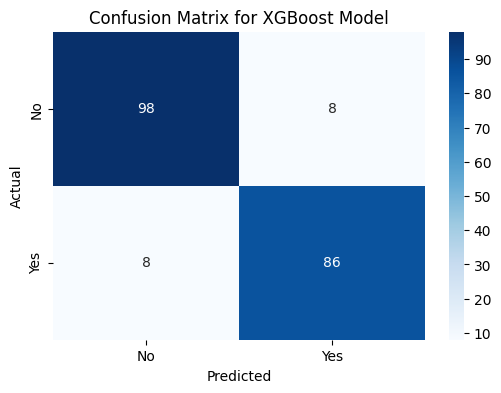

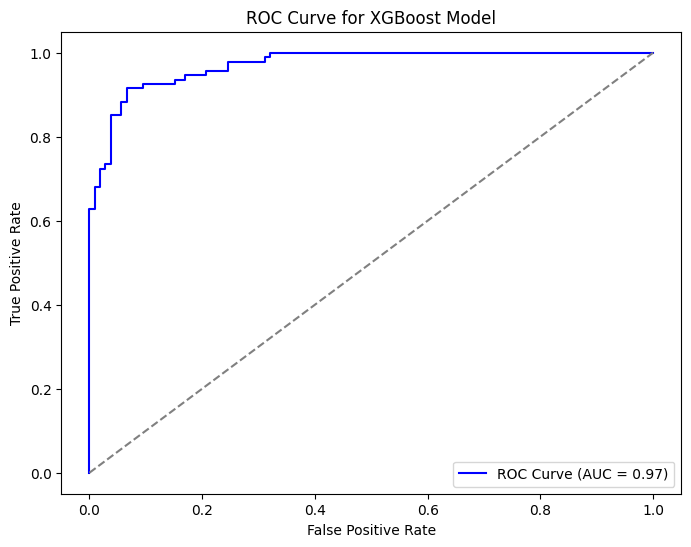

Accuracy: 0.92
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.92      0.92       106
           1       0.91      0.91      0.91        94

    accuracy                           0.92       200
   macro avg       0.92      0.92      0.92       200
weighted avg       0.92      0.92      0.92       200



In [28]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification

# Generate a synthetic binary classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=42)
# or load your dataset
# data = pd.read_csv('your_dataset.csv')
# X = data.drop('target_column', axis=1)
# y = data['target_column']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost model
model = xgb.XGBClassifier(
    n_estimators=100,        # Number of boosting rounds
    learning_rate=0.1,       # Step size shrinkage
    max_depth=3,             # Maximum depth of the tree
    random_state=42
)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Confusion Matrix Plot
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for XGBoost Model')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Dashed diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost Model')
plt.legend(loc='lower right')
plt.show()

# Print classification report
print(f'Accuracy: {accuracy:.2f}')
print("Classification Report:\n", classification_report(y_test, y_pred))


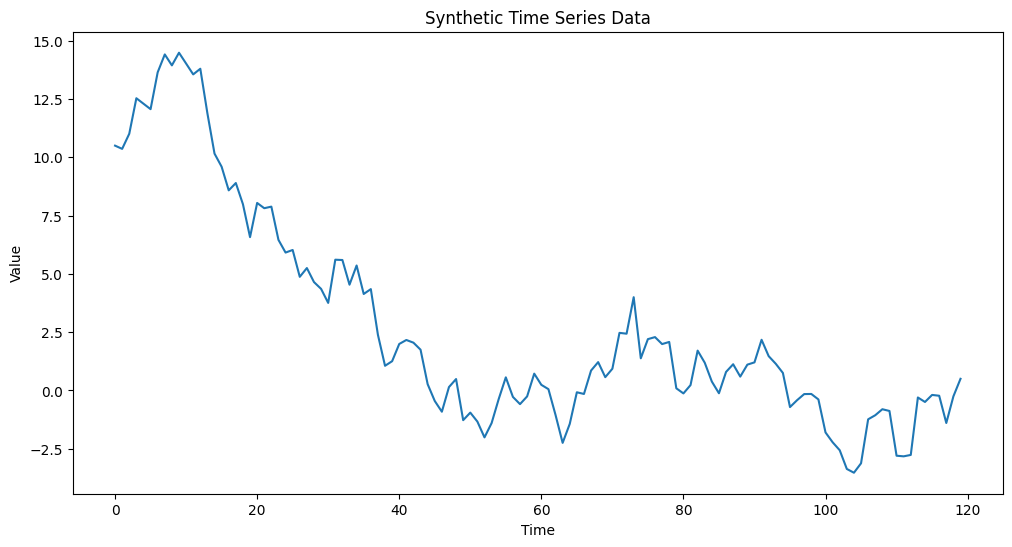

ADF Statistic: -2.078749737941929
p-value: 0.253144835176981


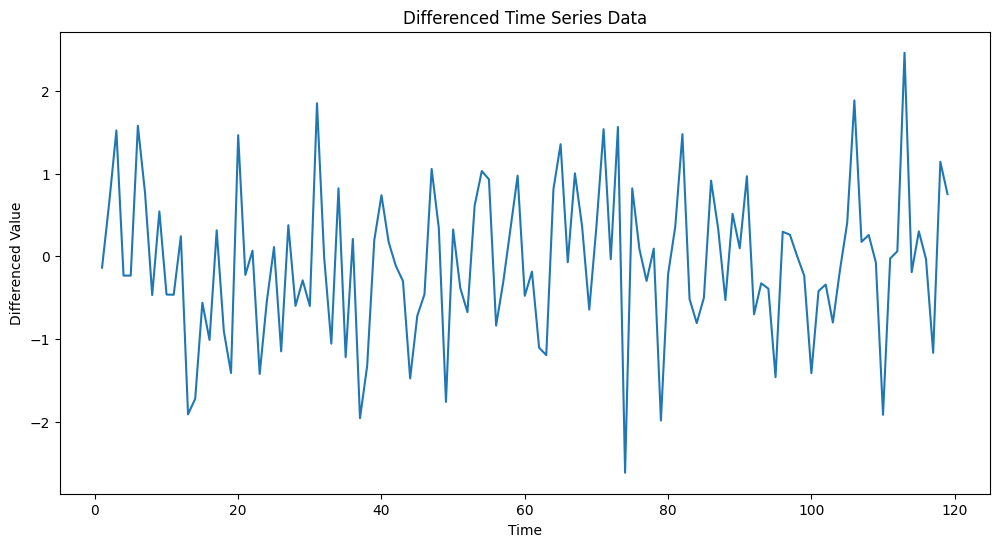

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  120
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -158.583
Date:                Sun, 27 Oct 2024   AIC                            323.166
Time:                        15:22:25   BIC                            331.504
Sample:                             0   HQIC                           326.552
                                - 120                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8369      0.178     -4.709      0.000      -1.185      -0.489
ma.L1          0.9193      0.133      6.926      0.000       0.659       1.179
sigma2         0.8405      0.105      8.014      0.0

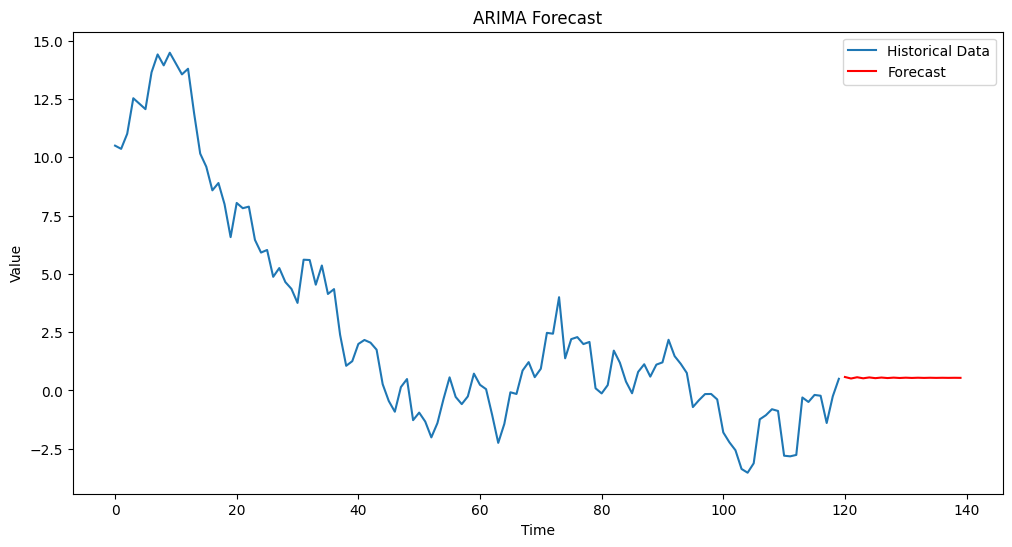

Mean Squared Error of the Forecast: 5.9179


In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Generate synthetic time series data
np.random.seed(42)
n = 120  # Number of observations
time = np.arange(n)
# Generate a random walk with a trend
data = pd.Series(np.cumsum(np.random.randn(n)) + 10)

# Plot the synthetic data
plt.figure(figsize=(12, 6))
plt.plot(time, data)
plt.title('Synthetic Time Series Data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

# Check for stationarity
result = adfuller(data)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Differencing the data if needed
data_diff = data.diff().dropna()

# Plot the differenced data
plt.figure(figsize=(12, 6))
plt.plot(data_diff)
plt.title('Differenced Time Series Data')
plt.xlabel('Time')
plt.ylabel('Differenced Value')
plt.show()

# Fit the ARIMA model (example: ARIMA(1, 1, 1))
model = ARIMA(data, order=(1, 1, 1))
model_fit = model.fit()

# Print the model summary
print(model_fit.summary())

# Make predictions
n_forecast = 20  # Number of steps to forecast
forecast = model_fit.forecast(steps=n_forecast)
forecast_index = np.arange(n, n + n_forecast)

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(time, data, label='Historical Data')
plt.plot(forecast_index, forecast, label='Forecast', color='red')
plt.title('ARIMA Forecast')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

# Calculate and print the Mean Squared Error (MSE)
# Assuming the last n_forecast points of the original data is known for error calculation
# This is just for demonstration; adjust according to your actual test set
mse = mean_squared_error(data[-n_forecast:], forecast[:len(data[-n_forecast:])])
print(f'Mean Squared Error of the Forecast: {mse:.4f}')


Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.1336 - val_loss: 0.0087
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0123 - val_loss: 0.0047
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0086 - val_loss: 0.0037
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0078 - val_loss: 0.0047
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0073 - val_loss: 0.0031
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0086 - val_loss: 0.0048
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0063 - val_loss: 0.0035
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0062 - val_loss: 0.0033
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0064 - val_loss: 0.0033
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0065 - val_loss: 0.0035
Epoch 11/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0056 - val_loss: 0.0031
Epoch 12/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0057 - val_loss: 0.0034

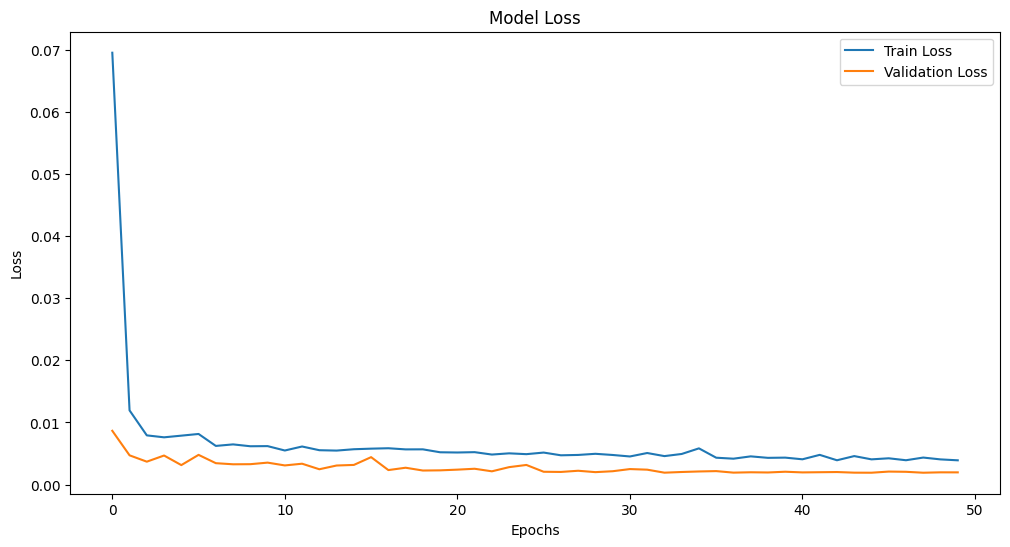

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Mean Squared Error: 0.0116
Accuracy of Predictions: 40.82%


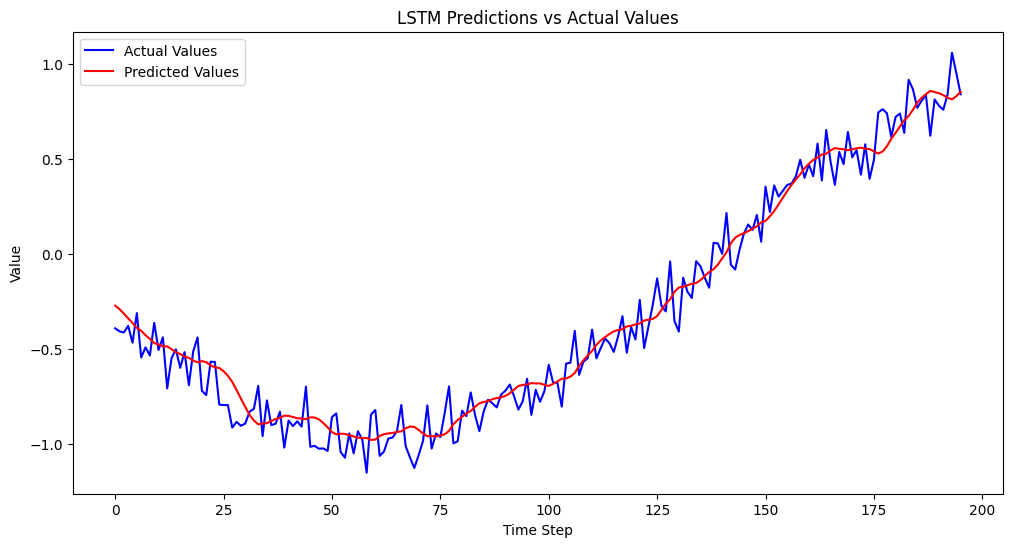

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Generate synthetic time series data
np.random.seed(42)
time = np.arange(1000)
data = np.sin(0.02 * time) + np.random.normal(0, 0.1, len(time))

# Prepare the dataset for LSTM
def create_dataset(data, time_step=1):
    X, Y = [], []
    for i in range(len(data) - time_step - 1):
        a = data[i:(i + time_step)]
        X.append(a)
        Y.append(data[i + time_step])
    return np.array(X), np.array(Y)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data.reshape(-1, 1)).flatten()

# Create the dataset
time_step = 20
X, y = create_dataset(data, time_step)

# Reshape input to be [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split the dataset into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))  # Output layer

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Plot training history
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Make predictions
y_pred = model.predict(X_test)

# Inverse transform predictions and actual values
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate Mean Squared Error
mse = np.mean((y_test_inv - y_pred_inv) ** 2)
print(f'Mean Squared Error: {mse:.4f}')

# Calculate Accuracy based on a custom threshold
threshold = 0.1  # 10% threshold
accurate_predictions = np.abs((y_test_inv - y_pred_inv) / y_test_inv) < threshold
accuracy = np.mean(accurate_predictions) * 100  # Convert to percentage
print(f'Accuracy of Predictions: {accuracy:.2f}%')

# Plot the predictions
plt.figure(figsize=(12, 6))
plt.plot(y_test_inv, label='Actual Values', color='blue')
plt.plot(y_pred_inv, label='Predicted Values', color='red')
plt.title('LSTM Predictions vs Actual Values')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.legend()
plt.show()
